Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
X_train.shape=(60000, 28, 28), y_train.shape=(60000,)
X_test.shape=(10000, 28, 28), y_test.shape=(10000,)
X_train.shape=(60000, 28, 28, 1)
X_test.shape=(10000, 28, 28, 1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
____________________________

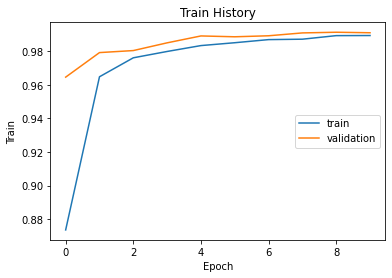

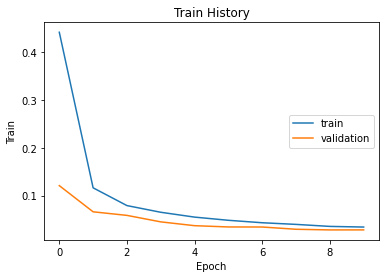

10000/10000 [==============================] - 1s 89us/step
(10000, 10)


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,1,1,0
1,0,1132,2,0,0,0,0,1,0,0
2,2,2,1024,0,0,0,0,2,2,0
3,0,0,2,1004,0,2,0,0,2,0
4,0,0,1,0,976,0,0,0,2,3
5,1,0,0,3,0,887,1,0,0,0
6,4,2,0,0,3,8,937,0,4,0
7,0,2,8,1,0,0,0,1015,1,1
8,3,0,2,1,0,1,0,2,963,2


In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train.shape={}, y_train.shape={}".format(X_train.shape, y_train.shape))

print("X_test.shape={}, y_test.shape={}".format(X_test.shape, y_test.shape))


# 接著我們必須將X_train及X_test dataset由原本三維轉為四維矩陣以符合CNN的需求，這是因為RGB圖片的格式為為width, height, channels，加上ID數維度為4。MNIST圖片為灰階因此其channel為1，轉換後的shape為(ID, width, height, channel)


X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
print("X_train.shape={}".format(X_train.shape))
print("X_test.shape={}".format(X_test.shape))


# 接下來將dataset的特徵值進行標準化，方法是除以255（因為圖像的像素點介於0~255之間），可讓所有的特徵值介於0與1之間。除了可提昇模型預測的準確度，梯度運算時也能更快收斂。


X_train = X_train / 255
X_test = X_test / 255


# Onehot encoding，將彼此間不相關且非有序的categories轉換為連續性且是有序數值。

y_train = np_utils.to_categorical(y_train)
y_test_categories = y_test
y_test = np_utils.to_categorical(y_test)


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()     



model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


train_history=model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), validation_split=0.2, epochs=10, batch_size=300, verbose=2)



def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')



scores = model.evaluate(X_test, y_test)
scores[1]


# Confusion Matrix混淆矩陣


import pandas as pd
prediction = model.predict_classes(X_test)
print(y_test.shape)
pd.crosstab(y_test_categories, prediction, rownames=['label'], colnames=['predict'])